> # Module Data Mining 

<img src="https://www.promptcloud.com/wp-content/uploads/2020/02/Data-Mining.png" title="Python Logo"/>

<dl>
<dt>Nom et Prénom :</dt>
<dd>LAMHOUR Mohamd Akram</dd>
<dd>MSALEK Mohamed</dd>
<dt>Tp : 1 </dt>
</dl> 

> # Web scraping linkedin

## Description


1.profile : link profile 

2.loc : localisation 

3.exp_title : Titre expérience  

4.type_experience  : type d'expérience

5.exp_company    :  expérience en entreprise

6.exp_dates  :      dates d'expérience

7.loc_company    :  localisation d'entreprise

8.exp_numbre    :   nombre d'expérience

9.school_name     : nom de l'école

10.ed_deg        :  niveau d'éducation

11.ed_title      :  éducation titre

12.ed_date       :  dates obtenir diplôme

13.skills:compétences 



### importation des bibliothèques



In [1]:
from  selenium import  webdriver
from  selenium.webdriver.common.keys import Keys
from time import  sleep
from bs4 import BeautifulSoup




#open chrome and login linkedin login sit





driver = webdriver.Chrome()
url = 'https://www.linkedin.com/login'
driver.get(url)
sleep(2)


###Create values Selenium
username = 'emaile@GMAIL.COM'
password = '*********'

email_field = driver.find_element_by_id('username')
email_field.send_keys(username)
sleep(3)

password_field = driver.find_element_by_name('session_password')
password_field.send_keys(password)
sleep(2)


login_field = driver.find_element_by_xpath('//*[@id="organic-div"]/form/div[3]/button')
login_field.click()
sleep(3)

#Serch 


search_field = driver.find_element_by_xpath('//*[@id="global-nav-typeahead"]/input')
search_query ='SIMO'
search_field.send_keys('big data')

search_field.send_keys(Keys.RETURN)
print('finish searching....')







<ipython-input-1-ebfa0e0746fd>:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  email_field = driver.find_element_by_id('username')
<ipython-input-1-ebfa0e0746fd>:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  password_field = driver.find_element_by_name('session_password')
<ipython-input-1-ebfa0e0746fd>:30: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  login_field = driver.find_element_by_xpath('//*[@id="organic-div"]/form/div[3]/button')


finish searching....


<ipython-input-1-ebfa0e0746fd>:34: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_field = driver.find_element_by_xpath('//*[@id="global-nav-typeahead"]/input')


### Collecte des urls


In [ ]:
def GetUrl():
    page_sourc = BeautifulSoup(driver.page_source)
    profiles =page_sourc.find_all('a', class_ ='app-aware-link')
    ALL_Profile_URL =[]
    for profile in profiles:
        profile_url=profile.get('href')
        if profile_url[25] =='i' and profile_url[28] !='A' : 
            profile_Url=''
            for i in  profile_url:
                if i != '?':
                    profile_Url +=i
                else:
                    break
                
            if profile_Url not in ALL_Profile_URL  :
                ALL_Profile_URL.append([profile_Url])
    ALL = [] 
    for i in ALL_Profile_URL : 
        if i not in ALL: 
            ALL.append(i) 
        
            
    return ALL

def GetURLsonPages():
    Number_of_page=44
    Urls_alls_page=[]
    for page in range(Number_of_page):
        try:
            Urls_one_page = GetUrl()
            sleep(0.75)
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);') 
            sleep(0.75)    
            next_button = driver.find_element_by_class_name('artdeco-pagination__button--next')
            next_button.click()
            Urls_alls_page = Urls_alls_page + Urls_one_page 
            sleep(0.75)
        except:
            print('PROBLEM')
            continue
            
    return Urls_alls_page


Urls_alls_page1 = GetURLsonPages()

### importation des urls

In [3]:
import csv
import pandas as pd
r = pd.read_csv("output_link_bigdata - 1.csv")
Urls_alls_page1=r.loc[:,"link"]
print(Urls_alls_page1)

0      https://www.linkedin.com/in/chaimae-drissi-sma...
1         https://www.linkedin.com/in/ismail-bouroummana
2               https://www.linkedin.com/in/anass-ouazri
3      https://www.linkedin.com/in/fayrouz-mounji-b02...
4        https://www.linkedin.com/in/moulay-tahar-alaoui
                             ...                        
346              https://www.linkedin.com/in/not-perfect
347              https://www.linkedin.com/in/afkirhicham
348           https://www.linkedin.com/in/mohamedzghari0
349    https://www.linkedin.com/in/otman-ait-chiekh-b...
350    https://www.linkedin.com/in/abdelhadi-essabri-...
Name: link, Length: 351, dtype: object


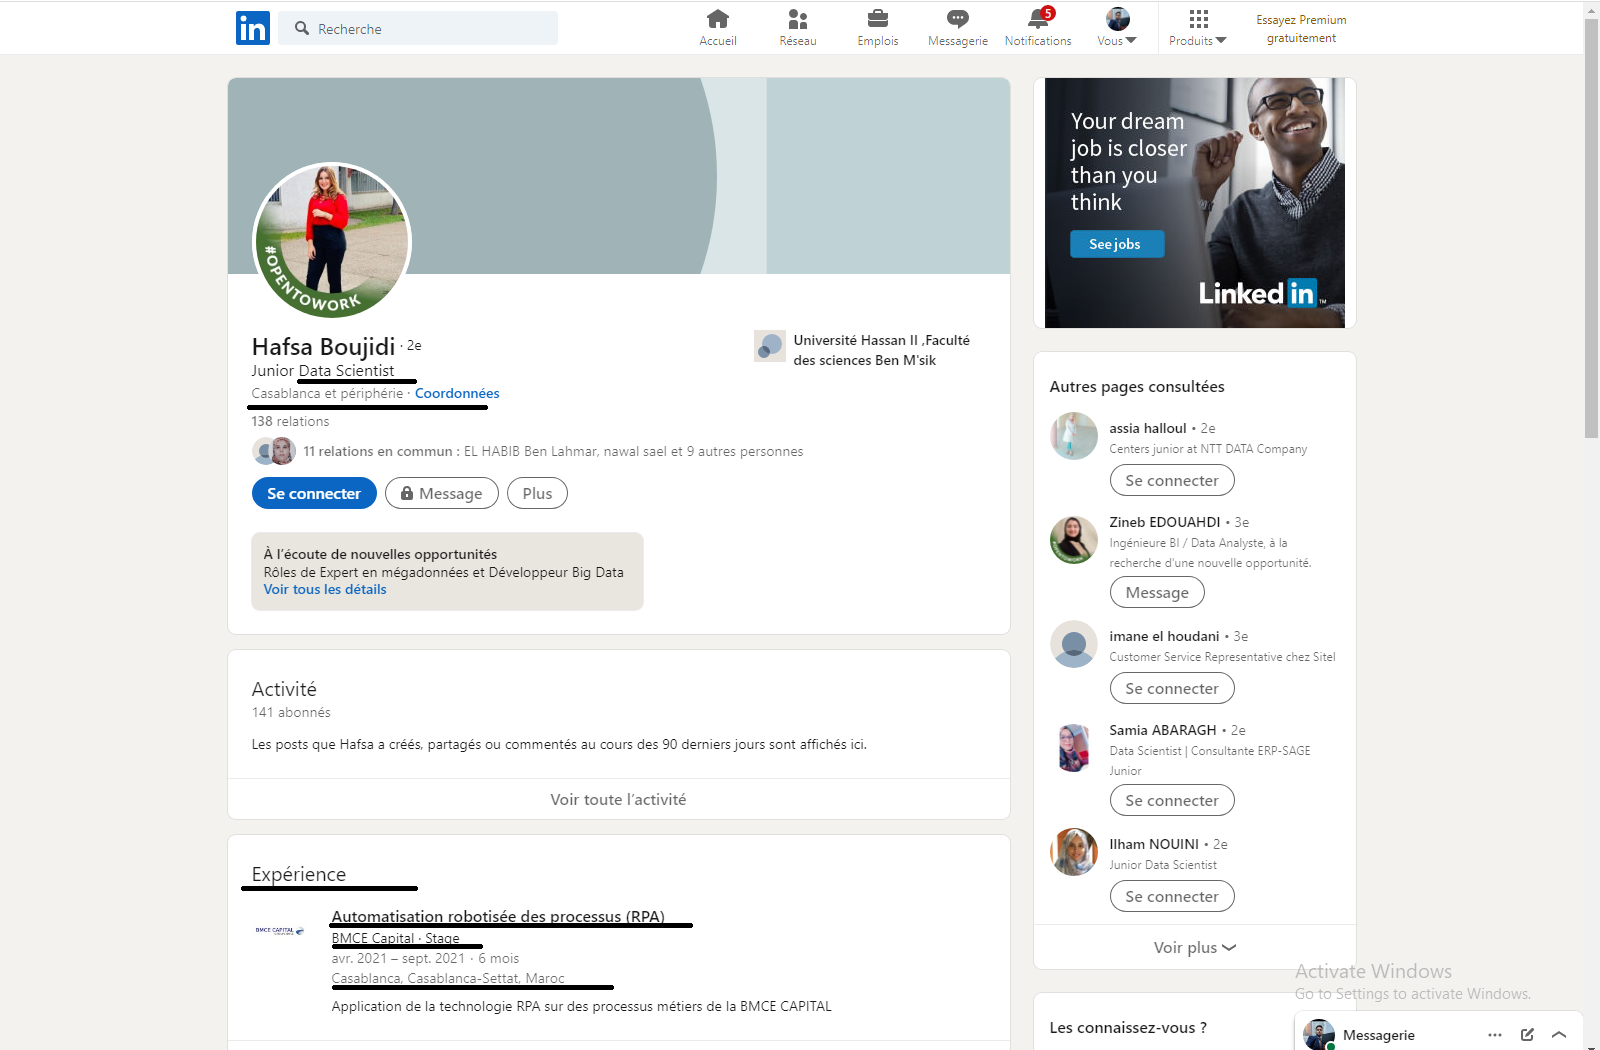

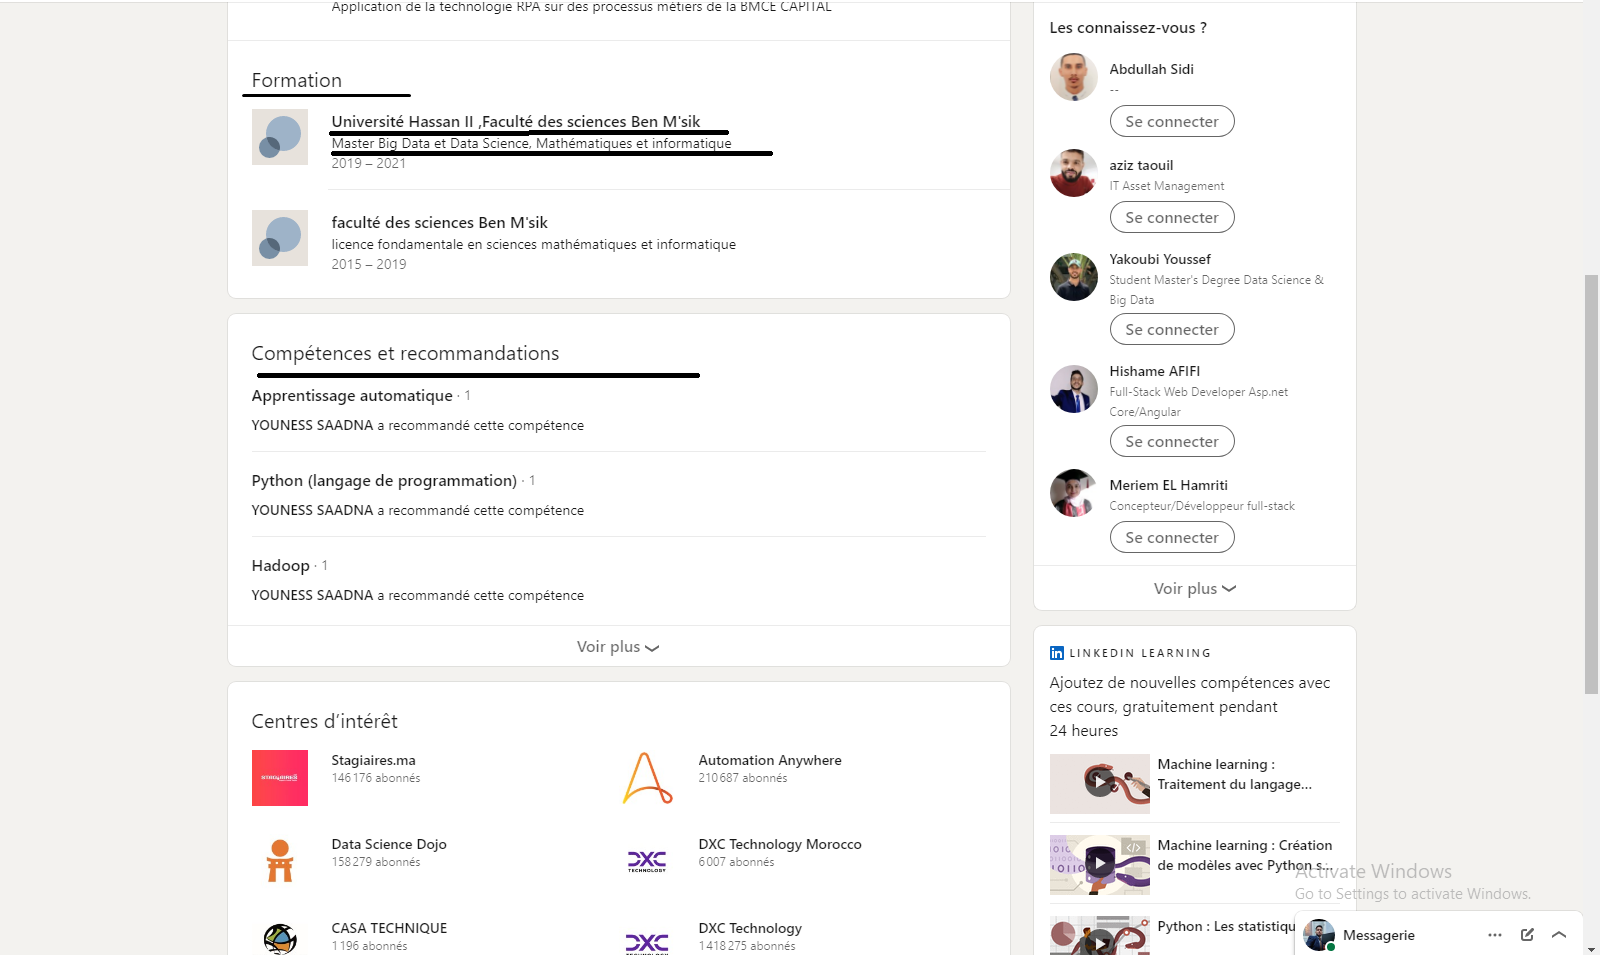

### large loop

In [ ]:
Exp_df = pd.DataFrame(columns = ['link', 'localisation', 'D_Expérience', 'Type_Expérienc','Nom_de_entreprise',
                                 'Dates_d_emploi','Lieu_entreprise','Numbre_Experience','school_name',
                                 'degree_name','Domaine','date','Competences'])
i=0
for page in Urls_alls_page1:
    i=i+1
    try:
        strr = ''.join(page)
        driver.get(strr)
        page_source = BeautifulSoup(driver.page_source,"lxml")
        #linkprint(page_source)
        info_div=page_source.find('div',class_ = 'mt2 relative')
        #print(info_div)
        #Profile
        info_loc = info_div.find_all('span',class_ = 'text-body-small inline t-black--light break-words')
        sleep(0.75)
        #print(info_loc)
        link = strr
        localisation = info_loc[0].get_text().strip()
        sleep(0.75)
        print(link)
        print(localisation)
        sleep(0.75)


    
        #Expérience
        driver.execute_script('window.scrollTo(0, 500);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 1000);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 1500);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 1900);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 1950);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2000);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2050);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2100);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2150);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2200);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2250);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2300);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2350);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2400);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2450);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2500);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2400);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2350);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2300);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2250);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2200);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2150);')
        sleep(0.5)
        driver.execute_script('window.scrollTo(0, 2100);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2050);')
        sleep(0.5) 
        driver.execute_script('window.scrollTo(0, 2000);')



        sleep(3)
        sleep(3)
        sleep(3)
        info_div=page_source.find('div',class_ = 'pv-profile-section-pager ember-view')
        #print(info_div)
        info_loc =info_div.find_all('li')
        #print(info_loc)
        sleep(0.75)
        D_Expérience=info_loc[0].find('h3', class_="t-16 t-black t-bold")
        sleep(0.75)




        if D_Expérience is None :
            D_Expérience= None
        else:
            D_Expérience=info_loc[0].find('h3', class_="t-16 t-black t-bold").get_text().strip()
            sleep(0.75)

        print(D_Expérience)


        if D_Expérience is not None:
            Type_Expérience =info_loc[0].find('span' , class_="pv-entity__secondary-title separator")
            sleep(0.75)
            if Type_Expérience is None: 
                Type_Expérienc = 'employee'
            else :
                Type_Expérienc = info_loc[0].find('span' , class_="pv-entity__secondary-title separator").get_text().strip()
                sleep(0.75)
            print(Type_Expérienc)



            Nom_de_entreprise=info_loc[0].find('p' , class_="pv-entity__secondary-title t-14 t-black t-normal")

            if Nom_de_entreprise is None:
                Nom_de_entreprise =None
            else:
                Nom_de_entreprise=info_loc[0].find('p' , class_="pv-entity__secondary-title t-14 t-black t-normal").get_text().strip()
                sleep(0.75)
                Nom_de_entreprise=Nom_de_entreprise.split("\n")
                Nom_de_entreprise=Nom_de_entreprise[0]
                print(Nom_de_entreprise)




            L=info_loc[0].find_all("h4" ,class_="pv-entity__location t-14 t-black--light t-normal block")
            sleep(0.75)

            if L != []:
                Lieu=L[0].find_all("span")
                Lieu=Lieu[1].get_text().strip()
            else:
                Lieu = None

            print(Lieu)



            d=info_loc[0].find_all("h4" ,class_="pv-entity__date-range t-14 t-black--light t-normal")
            Dates_d_emploi=d[0].find_all("span")
            sleep(0.75)
            if Dates_d_emploi is None:
                Dates_d_emploi=Dates_d_emploi[1]
            else:
                 Dates_d_emploi=Dates_d_emploi[1].get_text().strip()





            print(Dates_d_emploi)

            Numbre_Experience =len(info_loc)
            print(Numbre_Experience)
        sleep(0.75)






        #formation 
        if D_Expérience is None :
            info_div=page_source.find_all('div',class_ = 'pv-profile-section-pager ember-view')
            sleep(0.5)
            #print(info_div)
            info_loc1=info_div[0].find_all('li')
            sleep(0.5)
            #print(info_loc1)
            school_name=info_loc1[0].find('h3').get_text()
            sleep(0.5)
            print(school_name)
            sleep(0.5)
            degree_name=info_loc1[0].find('span', class_="pv-entity__comma-item").get_text()
            sleep(0.5)
            print(degree_name)
            D = info_loc1[0].find_all('p',class_="pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal")
            if D != []:
                Domaine = D[1].find('span', class_="pv-entity__comma-item").get_text()

            else :
                Domaine = degree_name

            sleep(0.5)
            print(Domaine)
            T=info_loc1[0].find_all('p',class_='pv-entity__dates t-14 t-black--light t-normal')
            d=T[0].find_all('time')
            sleep(0.5)
            date=d[1].get_text()
            sleep(0.5)
            print(date)

        else:
            info_div=page_source.find_all('div',class_ = 'pv-profile-section-pager ember-view')

            sleep(1)

            #print(info_div)
            info_loc1=info_div[1].find_all('li')
            #print(info_loc1)
            school_name=info_loc1[0].find('h3').get_text()
            print(school_name)
            degree_name=info_loc1[0].find('span', class_="pv-entity__comma-item").get_text()
            sleep(0.5)
            print(degree_name)
            D = info_loc1[0].find_all('p',class_="pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal")
            if D != []:
                Domaine = D[0].find('span', class_="pv-entity__comma-item").get_text()
            else :
                Domaine = degree_name
                sleep(0.5)

            print(Domaine)
            T=info_loc1[0].find_all('p',class_='pv-entity__dates t-14 t-black--light t-normal')
            d=T[0].find_all('time')
            sleep(0.5)
            date=d[1].get_text()
            sleep(0.5)
            print(date)




        #skill
        #info_div2=page_source.find_all('h2' ,class_="pv-profile-section__card-heading")
        #info_div2=info_div2[0].find_all('section')
        b1=BeautifulSoup(driver.page_source,"lxml")
        sleep(0.75) 
        info_div2=b1.find_all('ol' ,class_="pv-skill-categories-section__top-skills pv-profile-section__section-info section-info pb1")
        if info_div2 !=[]:
            skill=info_div2[0].find_all('span', class_="pv-skill-category-entity__name-text t-16 t-black t-bold")
            sleep(0.5)
            Competences =skill[0]
        else:
            Competences = None


        print(Competences)
        sleep(0.75)

        try:
            temp1 = pd.DataFrame({'link':link, 'localisation':localisation, 'D_Expérience':D_Expérience,
                                  'Type_Expérienc':Type_Expérienc,'Nom_de_entreprise':Nom_de_entreprise,
                                  'Dates_d_emploi':Dates_d_emploi,'Lieu_entreprise':Lieu,'Numbre_Experience':Numbre_Experience,
                                  'school_name':school_name,'degree_name':degree_name
                                  ,'Domaine':Domaine,'date':date,'Competences':Competences},index=[0])
            Exp_df = Exp_df.append(temp1)
        except:
            print('skipped')
            continue
    except:
        
        print('PROBLEM')
        continue
        
        
        
    if i == 100:
        sleep(10)
    if i == 200:
        sleep(10)
    if i == 300:
        sleep(10)
    if i == 400:
        sleep(10)
    

    print(i)
    
    
    
Exp_df.reset_index()  
Exp_df.to_csv("output_link_bigdata - 1-PROFIL.csv", index = False,sep='\t', encoding='utf-8')

    
    
    
    
    
    
    

In [7]:
Exp_df

,link,localisation,D_Expérience,Type_Expérienc,Nom_de_entreprise,Dates_d_emploi,Lieu_entreprise,Numbre_Experience,school_name,degree_name,Domaine,date,Competences
0,https://www.linkedin.com/in/fayrouz-mounji-b02...,"Rabat-Salé-Kénitra, Maroc",Ingénieur BI,Temps plein,DXC Technology Maroc,mai 2019 – Aujourd’hui,"Préfecture de Rabat, Morocco",3,Ecole des sciences de l'information (ESI),Ingénieur d'état en ingénierie des données et ...,Ingénierie de données et des connaissances,2018,\n Analyse de données\n
0,https://www.linkedin.com/in/moulay-tahar-alaoui,"Casablanca-Settat, Maroc",BIG DATA & Machine Learning Engineer,employee,Freelance,juil. 2020 – Aujourd’hui,None,5,FST Settat,Master Business Analytics et Big Data,Ingénierie informatique,2020,\n Windows Server\n
0,https://www.linkedin.com/in/manal-el-barmaki-5...,"Casablanca, Casablanca-Settat, Maroc",Ingénieur DevOps,Stage,CIH BANK,févr. 2020 – août 2020,"Casablanca, Casablanca-Settat, Maroc",6,Ecole Nationale des sciences Appliquées d'El J...,Diplôme d'ingénieur,Génie Informatique et Technologies Emergentes,2020,\n Python\n
0,https://www.linkedin.com/in/hajar-bentama-7153...,Rabat et périphérie,BI Engineer - Stage PFA,Stage,Banque Populaire du Maroc (Groupe) Inc,juil. 2021 – août 2021,"Rabat, Rabat-Salé-Kénitra, Maroc",2,Ecole Nationale des Sciences Appliquées de Ber...,Engineer's degree,Information Systems & Big Data,2022,\n Python\n
0,https://www.linkedin.com/in/hind-dihaji-8ab273163,Casablanca et périphérie,Business Intelligence Developer,Temps plein,AXA,sept. 2019 – Aujourd’hui,None,2,Université Hassan II Aïn Chock de Casablanca,Master's degree,Big Data & Cloud Computing,2019,\n Big data\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,https://www.linkedin.com/in/asmaa-oufkir-a7297720,"Casablanca, Casablanca-Settat, Maroc",Data Engineer Big data(Elasticsearch - Kafka -...,Temps plein,Docaposte,avr. 2021 – Aujourd’hui,Maroc,5,Faculté des Sciences Casablanca,Master Spécialisé Big Data et Cloud Computing(...,Science de l''ingénierie,2020,\n Gestion de projet\n
0,https://www.linkedin.com/in/not-perfect,"Beni Mellal, Béni Mellal-Khénifra, Maroc",Projet de fin d'étude,employee,Faculté des Sciences et Techniques de Béni Mellal,févr. 2019 – juin 2019,"Province de Béni Mellal, Morocco",2,Faculté des Sciences et Techniques de Béni Mellal,Master,Informatique décisionnelle,2019,\n Data Analysis\n
0,https://www.linkedin.com/in/afkirhicham,Casablanca et périphérie,Projet de fin d’études,Stage,MATHEI -La Marocaine des Thés et Infusions,mai 2020 – nov. 2020,"Casablanca, Casablanca-Settat, Maroc",2,ENSAM Casablanca,Master,Big Data et Internet des Objets,2020,\n Informatique décisionnelle\n ...
0,https://www.linkedin.com/in/mohamedzghari0,Maroc,Stagiaire,employee,Henceforth,mars 2018 – Aujourd’hui,morocoo,1,Universite Mohammed 5,Master's degree,Big Data,2018,\n Big data\n
